In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

In [43]:
# Diretório onde estão os arquivos
base_dir = "/home/claudio/projetos/case-solar-power-plant/dados/"

'''
Os arquivos de sensores térmicos das plantas 1 e 2 possuem os mesmos tipos de metadados
não havendo a necessidade de nenhum tipo de tratamento. 
'''

# Lê e concatena os arquivos de sensores
sensor_files = [os.path.join(base_dir, "weather_sensor_plant_1.csv"),
                os.path.join(base_dir, "weather_sensor_plant_2.csv")]

# Carrega e converte o campo DATE_TIME para datatime de forma padronizada
sensor_data = pd.concat([pd.read_csv(file) for file in sensor_files], ignore_index=True)
sensor_data['DATE_TIME'] = pd.to_datetime(sensor_data['DATE_TIME'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Verifique o resultado
display(sensor_data.head())
print("Total de registros sensor de temperatura:", len(sensor_data))
print("Tipo de DATE_TIME:", sensor_data['DATE_TIME'].dtype) 

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


Total de registros sensor de temperatura: 6441
Tipo de DATE_TIME: datetime64[ns]


In [44]:
# Caminhos para os arquivos de geração de energia
'''
A coluna DATE_TIME dos arquivos de geração de energia possuem formatos de datas distintas.
Nesse caso, houve a necessidade de padronizar essa coluna para deixá-la com o mesmo fomato.
'''
generation_plant_1_path = os.path.join(base_dir, "power_generation_plant_1.csv")
generation_plant_2_path = os.path.join(base_dir, "power_generation_plant_2.csv")

# Carrega os arquivos de geração e aplica a conversão de data para cada um
generation_plant_1 = pd.read_csv(generation_plant_1_path)
generation_plant_1['DATE_TIME'] = pd.to_datetime(generation_plant_1['DATE_TIME'], format='%d-%m-%Y %H:%M', errors='coerce')

generation_plant_2 = pd.read_csv(generation_plant_2_path)
generation_plant_2['DATE_TIME'] = pd.to_datetime(generation_plant_2['DATE_TIME'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Une os dados dos dois arquivos em um único DataFrame
generation_data = pd.concat([generation_plant_1, generation_plant_2], ignore_index=True)

# Verifique o resultado
display(generation_data)
print("\nTotal de registros geração de energia:", len(generation_data))
print("\nTipo de DATE_TIME - arquivo 1:", generation_plant_1['DATE_TIME'].dtype)
print("Tipo de DATE_TIME - arquivo 2:", generation_plant_2['DATE_TIME'].dtype)

# Verifica se houve alguma conversão falha (por exemplo, valores que não puderam ser convertidos)
print("\nTotal de registros com falhas:")
print(generation_data['DATE_TIME'].isnull().sum(), "erros no arquivo 1")
print(sensor_data['DATE_TIME'].isnull().sum(), "erros no arquivo 2")


,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0
...,...,...,...,...,...,...,...
136471,2020-06-17 23:45:00,4136001,q49J1IKaHRwDQnt,0.0,0.0,4157.0,520758.0
136472,2020-06-17 23:45:00,4136001,rrq4fwE8jgrTyWY,0.0,0.0,3931.0,121131356.0
136473,2020-06-17 23:45:00,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4322.0,2427691.0
136474,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,0.0,0.0,4218.0,106896394.0



Total de registros geração de energia: 136476

Tipo de DATE_TIME - arquivo 1: datetime64[ns]
Tipo de DATE_TIME - arquivo 2: datetime64[ns]

Total de registros com falhas:
0 erros no arquivo 1
0 erros no arquivo 2


In [45]:
# Agrupar dados por hora para facilitar a análise
generation_data['HOUR'] = generation_data['DATE_TIME'].dt.hour
sensor_data['HOUR'] = sensor_data['DATE_TIME'].dt.hour

# Exibir os dados com a nova coluna de hora
print("\nDados com Hora - Geração de Energia:")
print(generation_data[['DATE_TIME', 'HOUR']].head())

print("\nDados com Hora - Sensores Climáticos:")
print(sensor_data[['DATE_TIME', 'HOUR']].head())


Dados com Hora - Geração de Energia:
   DATE_TIME  HOUR
0 2020-05-15     0
1 2020-05-15     0
2 2020-05-15     0
3 2020-05-15     0
4 2020-05-15     0

Dados com Hora - Sensores Climáticos:
            DATE_TIME  HOUR
0 2020-05-15 00:00:00     0
1 2020-05-15 00:15:00     0
2 2020-05-15 00:30:00     0
3 2020-05-15 00:45:00     0
4 2020-05-15 01:00:00     1


In [46]:
# Supondo que você já tenha os dados de geração em um DataFrame chamado generation_data

# 1. Agrupar os dados por hora e somar a geração de energia
generation_hourly = generation_data.groupby('HOUR').agg({'AC_POWER': 'sum'}).reset_index()

# 2. Identificar os horários de pico (ex: os 3 maiores valores de AC_POWER)
top_hours = generation_hourly.nlargest(3, 'AC_POWER')

# Exibir as horas com maior geração
print("Horários de pico de geração de energia (3 maiores):")
print(top_hours)

# 3. Verificar períodos de 3 horas consecutivas
generation_hourly['PICK'] = generation_hourly['AC_POWER'] > (top_hours['AC_POWER'].min() * 0.9)  # Ajuste o limite conforme necessário

# Adiciona coluna de grupos
generation_hourly['GROUP'] = (generation_hourly['PICK'] != generation_hourly['PICK'].shift()).cumsum()

# Filtrar grupos de 3 ou mais horas consecutivas
periods_of_interest = generation_hourly[generation_hourly['PICK']].groupby('GROUP').filter(lambda x: len(x) >= 3)

# Exibir os períodos de interesse
print("\nPeríodos de 3 horas consecutivas com alta geração de energia:")
print(periods_of_interest[['HOUR', 'AC_POWER']])


Horários de pico de geração de energia (3 maiores):
    HOUR      AC_POWER
12    12  4.653586e+06
11    11  4.614045e+06
13    13  4.410951e+06

Períodos de 3 horas consecutivas com alta geração de energia:
    HOUR      AC_POWER
10    10  4.320007e+06
11    11  4.614045e+06
12    12  4.653586e+06
13    13  4.410951e+06
14    14  4.011078e+06


In [47]:
'''
Respondendo as perguntas do Case
'''

# 1. Melhor horário para redirecionamento de energia para baterias
def analyze_peak_hours(generation_df):
    hourly_ac_power = generation_df.groupby('HOUR')['AC_POWER'].sum()
    
    # Identificar o período de maior geração contínua (mínimo 3 horas)
    peak_hours = hourly_ac_power.sort_values(ascending=False).head(3).index.tolist()
    
    return peak_hours

# 2. Eficiência da disposição dos painéis
def analyze_panel_efficiency(generation_df):
    total_dc_power = generation_df['DC_POWER'].sum()
    total_ac_power = generation_df['AC_POWER'].sum()
    
    efficiency = (total_ac_power / total_dc_power) * 100
    return efficiency

# 3. Impacto da temperatura na eficiência
def analyze_temperature_impact(generation_df, weather_df):
    merged_data = pd.merge(generation_df, weather_df, on=['DATE_TIME', 'PLANT_ID'], suffixes=('_gen', '_weather'))

# Correlação entre temperatura ambiente e AC_POWER
    correlation_ambient = merged_data[['AMBIENT_TEMPERATURE', 'AC_POWER']].corr().iloc[0, 1]
    # Correlação entre temperatura do módulo e AC_POWER
    correlation_module = merged_data[['MODULE_TEMPERATURE', 'AC_POWER']].corr().iloc[0, 1]
    
    return correlation_ambient, correlation_module

# 4. Outros insights (Exemplo: impacto da irradiação)
def analyze_irradiation_impact(generation_df, weather_df):
    merged_data = pd.merge(generation_df, weather_df, on=['DATE_TIME', 'PLANT_ID'], suffixes=('_gen', '_weather'))
    
    # Correlação entre irradiação e AC_POWER
    correlation_irradiation = merged_data[['IRRADIATION', 'AC_POWER']].corr().iloc[0, 1]
    
    return correlation_irradiation

# Execução das análises
peak_hours = analyze_peak_hours(generation_data)
efficiency = analyze_panel_efficiency(generation_data)
correlation_ambient, correlation_module = analyze_temperature_impact(generation_data, sensor_data)
correlation_irradiation = analyze_irradiation_impact(generation_data, sensor_data)

# Resultados
print(f"Melhores horários para redirecionamento de energia: {peak_hours}")
print(f"Eficiência dos painéis: {efficiency:.2f}%")
print(f"Correlação entre temperatura ambiente e geração de energia: {correlation_ambient:.2f}")
print(f"Correlação entre temperatura do módulo e geração de energia: {correlation_module:.2f}")
print(f"Correlação entre irradiação e geração de energia: {correlation_irradiation:.2f}")

Melhores horários para redirecionamento de energia: [12, 11, 13]
Eficiência dos painéis: 16.08%
Correlação entre temperatura ambiente e geração de energia: 0.57
Correlação entre temperatura do módulo e geração de energia: 0.85
Correlação entre irradiação e geração de energia: 0.88


### Análise de Períodos de Pico de Geração de Energia

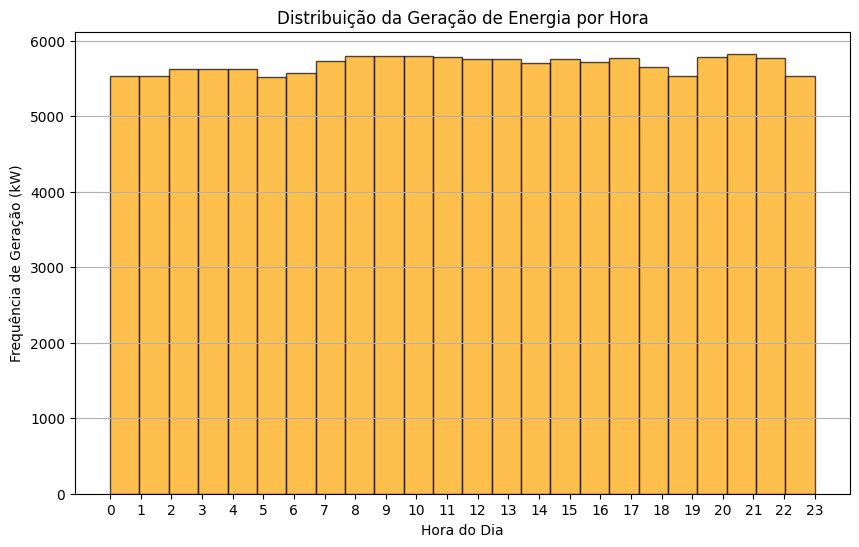

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(generation_data['HOUR'], bins=24, alpha=0.7, color='orange', edgecolor='black')
plt.title('Distribuição da Geração de Energia por Hora')
plt.xlabel('Hora do Dia')
plt.ylabel('Frequência de Geração (kW)')
plt.xticks(range(24))
plt.grid(axis='y')
plt.show()


### Eficiência da Disposição dos Painéis

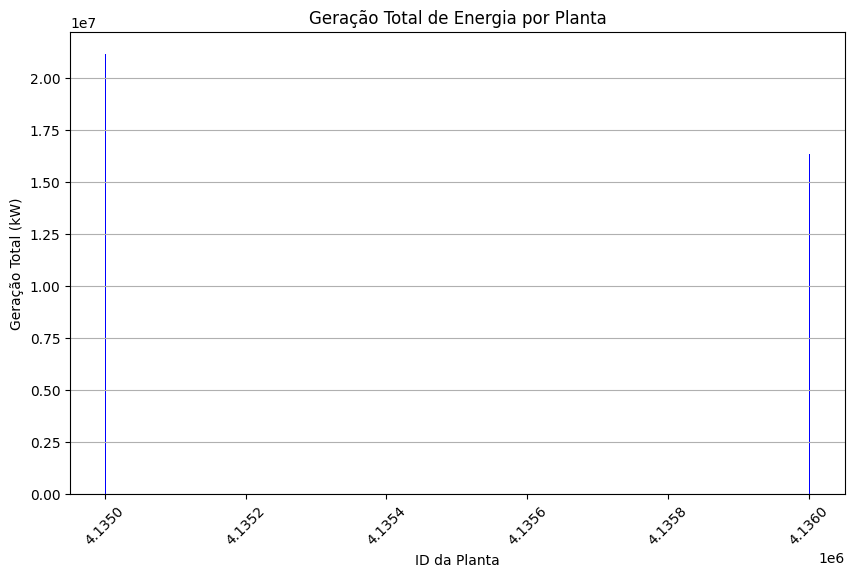

In [49]:
plt.figure(figsize=(10, 6))
generation_summary = generation_data.groupby('PLANT_ID')['AC_POWER'].sum().reset_index()
plt.bar(generation_summary['PLANT_ID'], generation_summary['AC_POWER'], color='blue')
plt.title('Geração Total de Energia por Planta')
plt.xlabel('ID da Planta')
plt.ylabel('Geração Total (kW)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### Impacto da Temperatura e Irradiação na Geração de Energia

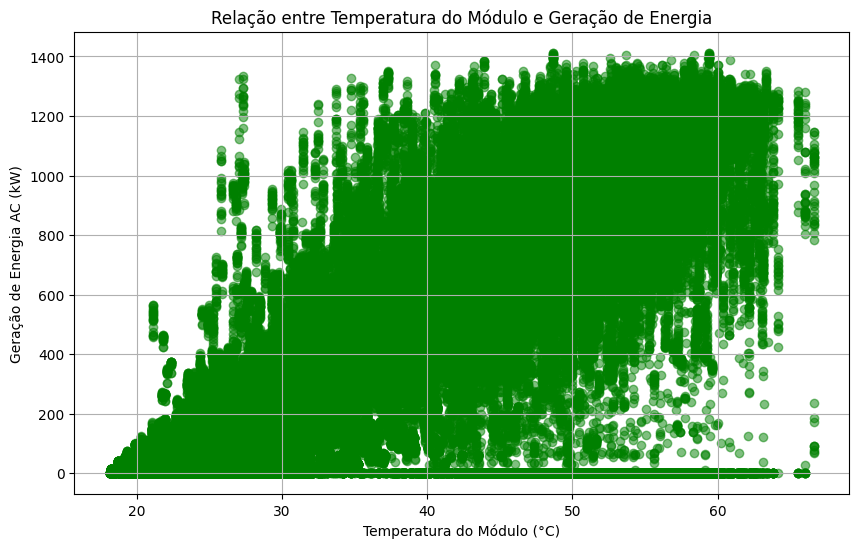

In [50]:
# Supondo que você tenha uma coluna DATE_TIME em ambos os DataFrames
# Primeiro, vamos garantir que ambas as colunas sejam do tipo datetime
sensor_data['DATE_TIME'] = pd.to_datetime(sensor_data['DATE_TIME'])
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'])

# Realiza a junção com base na coluna DATE_TIME
combined_data = pd.merge(sensor_data, generation_data, on='DATE_TIME', how='inner')

# Agora você pode plotar as colunas alinhadas
plt.figure(figsize=(10, 6))
plt.scatter(combined_data['MODULE_TEMPERATURE'], combined_data['AC_POWER'], alpha=0.5, color='green')
plt.title('Relação entre Temperatura do Módulo e Geração de Energia')
plt.xlabel('Temperatura do Módulo (°C)')
plt.ylabel('Geração de Energia AC (kW)')
plt.grid()
plt.show()


### Análise de Irradiação vs. Geração de Energia

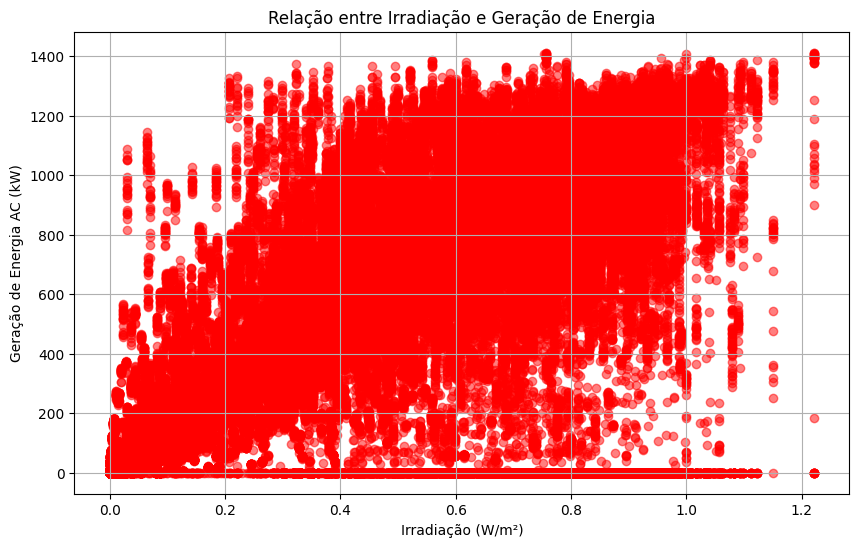

In [51]:
# Certifique-se de que ambas as colunas de data e hora sejam do tipo datetime
sensor_data['DATE_TIME'] = pd.to_datetime(sensor_data['DATE_TIME'])
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'])

# Realize a junção com base na coluna DATE_TIME
combined_data = pd.merge(sensor_data, generation_data, on='DATE_TIME', how='inner')

# Agora você pode plotar as colunas que estão alinhadas
plt.figure(figsize=(10, 6))
plt.scatter(combined_data['IRRADIATION'], combined_data['AC_POWER'], alpha=0.5, color='red')
plt.title('Relação entre Irradiação e Geração de Energia')
plt.xlabel('Irradiação (W/m²)')
plt.ylabel('Geração de Energia AC (kW)')
plt.grid()
plt.show()


### Gráfico: Boxplot da Geração de Energia por Hora

<Figure size 1000x600 with 0 Axes>

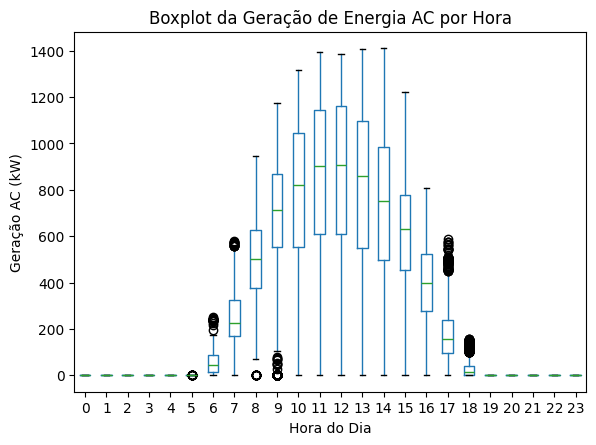

In [52]:
plt.figure(figsize=(10, 6))
generation_data.boxplot(column='AC_POWER', by='HOUR', grid=False)
plt.title('Boxplot da Geração de Energia AC por Hora')
plt.suptitle('')
plt.xlabel('Hora do Dia')
plt.ylabel('Geração AC (kW)')
plt.show()

### Outros Insights

In [53]:
# Agrupamento por PLANT_ID, somando os valores de DAILY_YIELD por cada SOURCE_KEY único
agrupado = generation_data.groupby(['PLANT_ID']).agg({
    'DAILY_YIELD': 'count'
}).reset_index()

# Exibe o resultado
print(agrupado)

   PLANT_ID  DAILY_YIELD
0   4135001        68778
1   4136001        67698


In [54]:
# Filtra o DataFrame com as condições específicas
registro_especifico = generation_data.loc[
    (generation_data['PLANT_ID'] == 4135001) &
    (generation_data['SOURCE_KEY'] == '1BY6WEcLGh8j5v7')
]

# Exibe o resultado
registro_especifico.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,HOUR
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,0
21,2020-05-15 00:15:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,0
42,2020-05-15 00:30:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,0
63,2020-05-15 00:45:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,0
84,2020-05-15 01:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,1
